In [2]:
# residual = artık,kalıntı

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load our diabetes dataset
diabetes = load_diabetes()
# Convert the data to a pandas dataframe
my_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
# Add the target 25 to 346
my_df["Target"] = diabetes.target

#Garb the head
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# Split the data into X and Y
X = my_df.drop("Target",axis=1)
y = my_df["Target"]
X.shape,y.shape

((442, 10), (442,))

In [5]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# random_state=42 42 is a random IDK why research this.

# print out the shape of the training and testing sets
print("Training set shape: ",X_train.shape,y_train.shape)
print("Testing set shape: ",X_test.shape,y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [6]:
# Create Linear Regression Instance ( instance = misal,örnek)
from sklearn.linear_model import LinearRegression

#Create a linear regression model
lr = LinearRegression()

In [7]:
# Train the model on the training set - This is how the model learns
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
# Predict on the testing set
# y_preds are predicted values of te target variable based on the features
# Once we have those preds, we can compare them to the actual values of the target variable
# to evaluate the performance of the model
y_pred = lr.predict(X_test)
y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the performance of the model ( evaluate = değerlendirmek )
r2=r2_score(y_test,y_pred) # variance of the dependent variable (target) explained by the independet variables (features)
                           # how well the model fits the data. Higher is better. (0 to 1)

mse= mean_squared_error(y_test,y_pred) # MSE : average squared distance between the predicted and actual values. Lower is better

mae= mean_absolute_error(y_test,y_pred) # MAE: average absolute distance between the redicsted and actual values. Lower is better 

intercept= lr.intercept_ # Intercept : starting point of the regression line on the y-axis.
                         # Value of dependet variable (target) when the independert variables (features) are  0
                         # If positive number, target icreases as features increase, if negative - oppositive
                         

print("r2 : ",r2)
print("mse : ",mse)
print("mae : ",mae)
print("Intercept : ",intercept)

r2 :  0.4526027629719195
mse :  2900.1936284934814
mae :  42.79409467959994
Intercept :  151.34560453985995


Text(0.5, 1.0, 'Predicted vs. Actual Values (Linear Regression) ')

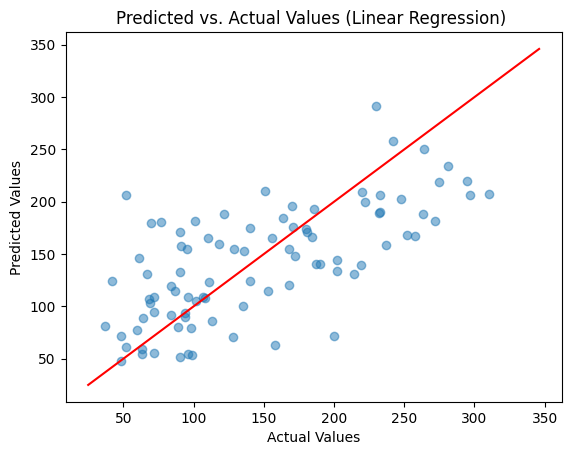

In [32]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values
# Predicted values of the target variable are plotted on the x-axis
# Actual values of the target variable are plotted on the y-axis
# If the model is a good fit, the points should be close to the diagonal line.,
# indicating a strong linear relationship between the actual and predicted value.
# ( indicate = belirtmek )

plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="Red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression) ")

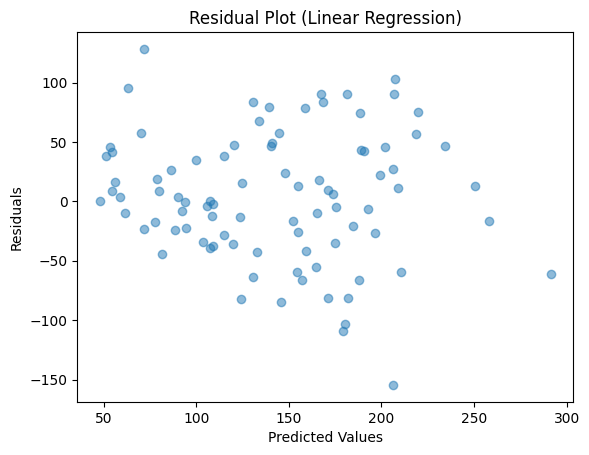

In [31]:
# Graph the Residuals
# The residuals are plotted against the predicted values of the target variable.
# If the linear regression model is a good fit for the data,
# the residual plot should show a random scatter of the points about zero
# With no discernable trend
plt.scatter(y_pred,y_test - y_pred,alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

